## ENDG 310 Fall 2023
## Lab 2
### Reading and Displaying Data

In this lab, you will analyze global $CO_2$ data and Canadian forest fire data utilizing datasets from the Government of Canada and from the U.S. National Oceanic and Atmospheric Administration.  

### Objectives
After completing this lab, you should be able to:
- Checkout, commit, and sync a github repository.  
- Create and use a `.gitignore` file.
- Load and plot data from csv and xls files.
- Manipulate data and find statistics.
- Create an visual infographic that summarizes your interpretation of the data.

### Lab submission
This lab is due at 5:00 PM on Friday, September 29th via github.  Be sure to **commit** and **push** your final code prior to the final deadline.  You submit the following:
- all code you used, either as `ipynb` or `py` files.
- a README.md file, properly formatted with headings and explainations, which summarizes the lab and your results and must include your final infographic.

You may create a new `ipynb` or `py` files or use this one.

## Step 1: Data
Global $CO_2$ data may be obtained from the **Global Monitoring Laboratory** at the **Mauna Loa Observatory** in the Hawaiian Islands by visiting this __[link](https://gml.noaa.gov/ccgg/trends/data.html)__.  You may use the daily or monthly data.

There are multiple sources available for wildfire data in Canada.  The simplest data source is the summary statistics from Natural Resources Canada, found __[here](https://cwfis.cfs.nrcan.gc.ca/datamart/download/nfdbpnt)__.  Data from 2022 and estimated data for 2023 will need to be appended manually as the data only goes through 2021.  A visual of all burned area for the past 100 years can be seen __[here](https://canadiangeographic.ca/articles/mapping-100-years-of-forest-fires-in-canada/)__.

**IMPORTANT**: create a `data` folder and place the data files there.  Add the `data` folder to your `.gitignore` file as those files should **not** be included as part of your repository.  Include a discussion of your source of data and where you expect a user to place the data files when downloaded if they checkout your repository.

Once you have downloaded the data, load the data using `numpy` or `pandas`.  Ask ChatGPT to suggest code.  You may need to reformat the data files.  **If you use ChatGPT**, include the prompt you used to get the proper code snippet as a comment before your code.

In [159]:
"""
Your code can go here or in a separate file.
"""
import pandas as pd
import numpy as np
#Code gotten from chatgpt promt'please suggest a code that loads excel data using numpy or pandas'
# Load data from an Excel file
fire_data = pd.read_excel('Data_Lab2/NFDB.xlsx') 
# Load data from a CSV file using pandas
CO2_data = pd.read_csv('Data_Lab2/co2_mm_mlo.csv')

print(fire_data)
print(CO2_data)


    YEAR  FIRES  TOTAL_HA  MAX_SIZE_HA  FIRES >200ha  TOTAL_HA (>200ha)
0   2023      0  11506693            0             0                  0
1   2022      0   1467970            0             0                  0
2   2021   6709   4078897       271701           596            4038710
3   2020   4001    218232        50892            80             206153
4   2019   4062   1786214       350135           192            1765436
..   ...    ...       ...          ...           ...                ...
60  1963   3047    174876        30364           122             165353
61  1962   1957    325129        51800           116             320095
62  1961   4219   2778096       199914           463            2758136
63  1960   2856    597841        41625           256             584942
64  1959   1632    287626        36211           161             278121

[65 rows x 6 columns]
     year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0    1958      3     1958.2027   315.7

## Step 2: Plot the data
Recreate the following plots using `Matplotlib`.  You may use `Plotly` or other tools, however, start simple.

### Historical fire data
<img src="./images/nrcan_historical_fires.png" alt="NRCan summary of annual wild fires" title="Annual burned area in Canada"/>

Note: you should include 2022 and 2023 data in your plot.  You may add these data points to the data file directly.

### Atmospheric $CO_2$ data
<img src="./images/co2_trend_mlo.png" alt="Historic atmospheric CO2 data" title="Atmospheric CO2 data from Mauna Loa Observatory" />

Note: you should include data through the end of June 2023.

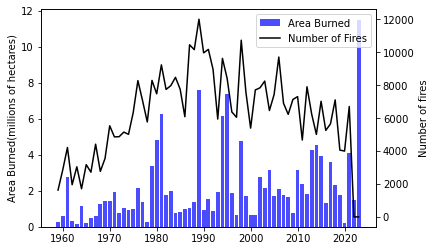

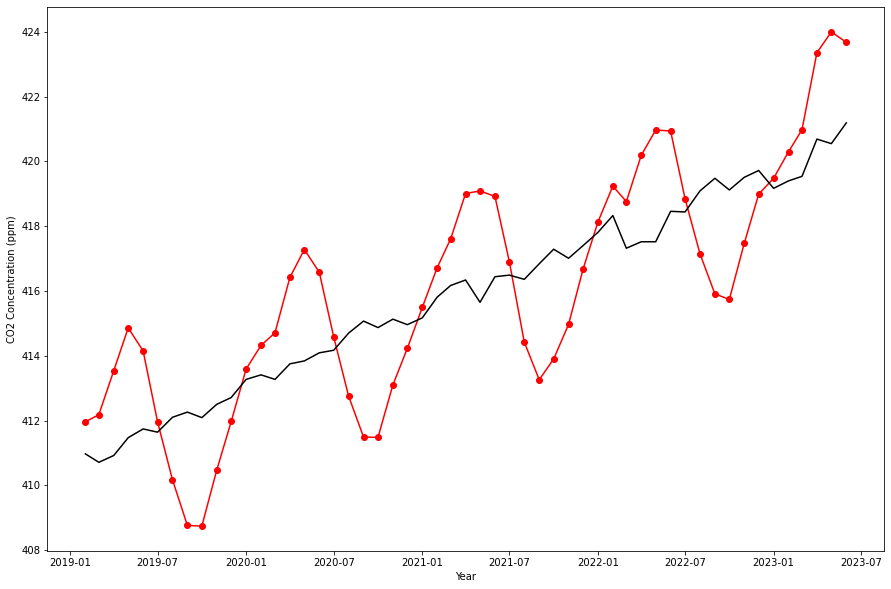

In [160]:
"""
Code should be well formatted and well commented.  You may put your code here or in a separate file.
"""
#historical fire
import matplotlib.pyplot as plt
fire_data['YEAR']=pd.to_numeric(fire_data['YEAR'],errors='coerce')
years=fire_data['YEAR'].astype(int)
area_burned=fire_data['TOTAL_HA']
num_fires=fire_data['FIRES']
fig,ax1=plt.subplots()
ax1.set_xlabel=("Years")
ax1.set_ylabel("Area Burned(millions of hectares)",color="k")
ax1.bar(years,[area/1e6 for area in area_burned],color="blue",alpha=0.7,label="Area Burned")
ax1.tick_params(axis="y",labelcolor="k")
ax2=ax1.twinx()
ax2.set_ylabel("Number of fires",color="k")
ax2.plot(years,num_fires,color="k",linestyle="-",label="Number of Fires")
ax2.tick_params(axis="y",labelcolor="k")
lines1,labels1=ax1.get_legend_handles_labels()
lines2,labels2=ax2.get_legend_handles_labels()
ax2.legend(lines1+lines2,labels1+labels2,loc="upper right")
plt.title=("Number of Fires and Area Burned in Canada by Year" + "\n" + "Source:Canadian National Fire Database(CNFDB)" + "\n")

plt.show()

#CO2 data
import matplotlib.pyplot as plt
import pandas as pd


df=pd.DataFrame(CO2_data.tail(53))
df['Date']=df['year'].astype(str)+'-'+df['month'].astype(str)
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d %H:%M:%S')
plt.figure(figsize=(15,10))
plt.plot(df['Date'],df['average'], marker='o', linestyle='-', color='red')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.plot(df['Date'], df['deseasonalized'], marker='',color='k')
plt.title=('Recently monthly mean CO2 at Mauna Loa Observatory')
plt.show()











## Part 3: Analyze the data
Create summary statistics based on the data, and determine if there are any relationships in the data.  These can include:
- Compute and plot the annual increase in $CO_2$ in each year.
- Compute and plot the annual increase in $CO_2$ each summer and decrease in $CO_2$ each winter.
- Compare the annual increase in $CO_2$ with annual wildfire burn area.
- etc.

You must show at least three different computed values or cross plots, one of which must be different from those suggested above.  At least two of the computed values should be time series.

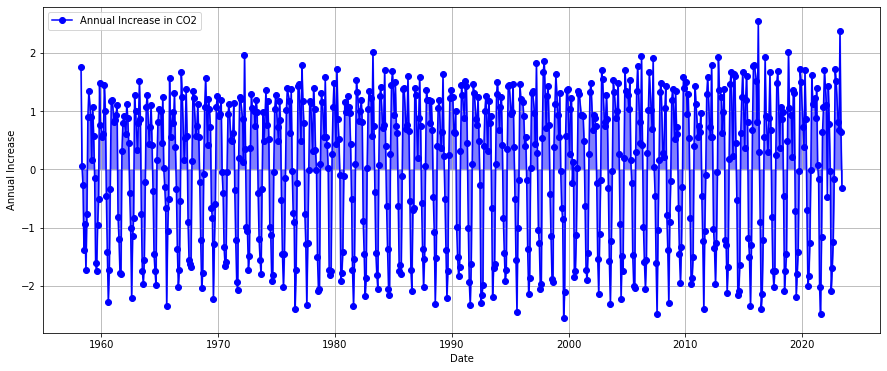

In [14]:
"""
Your code can go here or in a separate file.
"""
#Compute and plot the annual increase in CO2 in each year
#Used chatgpt prompt'for a data having c02 each year and month give me a code that computes and plots annual increase in co2 each year'
import pandas as pd

# Load data from a CSV file into a pandas DataFrame
data_CO2 = pd.read_csv('Data_Lab2/co2_mm_mlo.csv')

# Create a datetime column combining 'Year' and 'Month'
data_CO2['Date'] = pd.to_datetime(data_CO2[['year', 'month']].assign(day=1))

# Set the 'Date' column as the index
data_CO2.set_index('Date', inplace=True)
data_CO2['Annual_Increase'] = data_CO2['average'].groupby(data_CO2.index.year).diff()

# Drop rows with NaN (first month of each year)
data_CO2.dropna(subset=['Annual_Increase'], inplace=True)
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.fill_between(data_CO2.index, data_CO2['Annual_Increase'], color='blue', alpha=0.5)
plt.plot(data_CO2.index, data_CO2['Annual_Increase'], color='blue', marker='o', linestyle='-', label='Annual Increase in CO2')
plt.xlabel('Date')
plt.ylabel('Annual Increase')
plt.title = ('Annual Increase in CO2 Levels')
plt.legend()
plt.grid(True)
plt.savefig('Image4.jpg', bbox_inches='tight')
plt.show()






















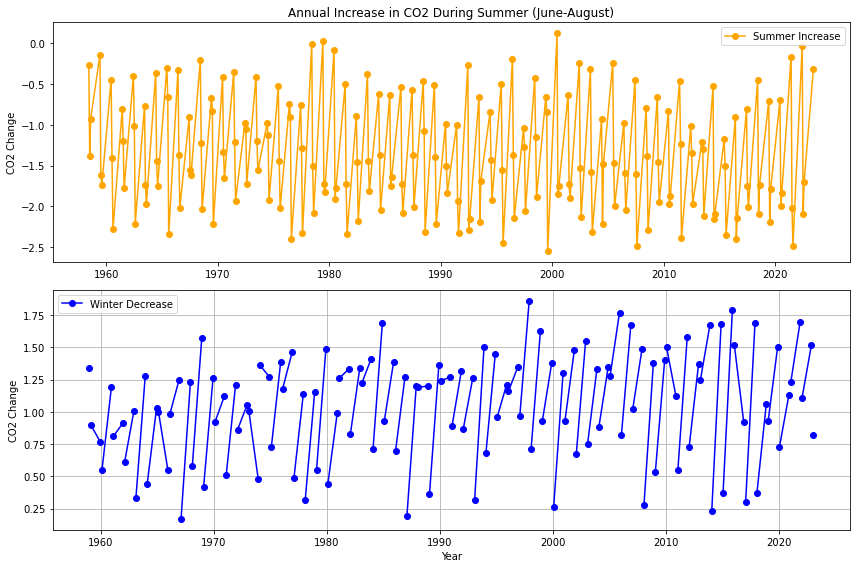

In [12]:
###Code to compute and plot increase inCO2 each summer and decrease each winter
import pandas as pd
import matplotlib.pyplot as plt

# Load data from a CSV file into a pandas DataFrame
data = pd.read_csv('Data_Lab2/co2_mm_mlo.csv')

# Create a datetime column combining 'Year' and 'Month'
data['Date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))
data.set_index('Date', inplace=True)

# Group the data by year
data_by_year = data.groupby(data.index.year)

# Calculate the annual increase during summer (June to August) and decrease during winter (December to February)
summer_increase = data_by_year['average'].diff().loc[data.index.month.isin([6, 7, 8])]
winter_decrease = data_by_year['average'].diff().loc[data.index.month.isin([12, 1, 2])]

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot the annual increase during summer
ax1.plot(summer_increase.index, summer_increase, label='Summer Increase', color='orange', marker='o')
ax1.set_ylabel('CO2 Change')
ax1.set_title('Annual Increase in CO2 During Summer (June-August)')
ax1.legend()

# Plot the annual decrease during winter
ax2.plot(winter_decrease.index, winter_decrease, label='Winter Decrease', color='blue', marker='o')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO2 Change')
ax2.set_title=('Annual Decrease in CO2 During Winter (December-February)')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.grid(True)
plt.savefig('foo.jpg', bbox_inches='tight')

plt.show()

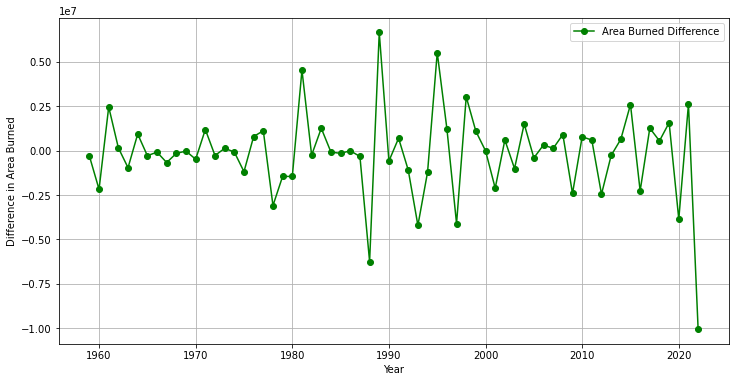

In [13]:
###Code to graphically represent the difference in the area burned between each year
import pandas as pd
import matplotlib.pyplot as plt
fire_data = pd.read_excel('Data_Lab2/NFDB.xlsx') 
# Load your dataset containing 'Year' and 'Area_Burned' columns
fire_data['YEAR']=pd.to_numeric(fire_data['YEAR'],errors='coerce')
fire_data['Area_Burned_Difference'] = fire_data['TOTAL_HA'].diff()

# Create a line plot to visualize the difference in area burned
plt.figure(figsize=(12, 6))
plt.plot(fire_data['YEAR'], fire_data['Area_Burned_Difference'], label='Area Burned Difference', color='green', marker='o')
plt.xlabel('Year')
plt.ylabel('Difference in Area Burned')
plt.title=('Difference in Area Burned Between Consecutive Years')
plt.legend()
plt.grid(True)
plt.savefig('Image1.jpg', bbox_inches='tight')
# Show the plot
plt.show()


## Part 4: Create an infographic
Combine several relevant plots into a single figure to create an infographic.  For more information about infographics and some examples, click __[here](https://infogram.com/page/infographic)__.  You may add some text, and you are encouraged to use different types of plots, for examples, see __[here](https://matplotlib.org/stable/gallery/index.html)__.

Save your final figure as a `jpg` or `png` file, and make sure it is included (and displayed) in the `README`.

Your infographic should include at least 3 different subplots showing at least 4 different time or data series.  The infographic must be easy to read and understand and should contain sufficient labels and information to convey your message.

In [26]:
"""
Your code can go here or in a separate file.
"""
from PIL import Image, ImageDraw, ImageFont

# Load the three images you want to combine
image1 = Image.open('Image1.jpg')  # Replace with the path to your first image
image2 = Image.open('Image4.jpg')  # Replace with the path to your second image
image3 = Image.open('foo.jpg')  # Replace with the path to your third image

# Get the dimensions of the images
width1, height1 = image1.size
width2, height2 = image2.size
width3, height3 = image3.size

total_width = max(width1, width2, width3)+200
total_height = (height1 + height2 + height3)+200

# Create a new blank image with the dimensions of the infographic
infographic = Image.new('RGBA', (total_width, total_height), (0, 0, 0, 0))

# Paste the first two images side by side at the top
infographic.paste(image3, (0, 0))
infographic.paste(image2, (0, 600))

# Paste the third image at the bottom in the middle
infographic.paste(image1, (0,1000))

# Create a drawing object for adding text

draw = ImageDraw.Draw(infographic)
title = "SHINE INFOGRAPHIC ON CO2 AND AREA BURNED"
font = font = ImageFont.load_default() # Adjust the font and size as needed
text_width, text_height = draw.textsize(title, font=font)
x = 0
y = (0)
draw.text((x, y), title, font=font, fill='black')

# Save the infographic as a new image
infographic.save('my_1infographic.png', format='PNG')









